In [21]:
from zipfile import ZipFile
import xml.etree.ElementTree as ET
import base64
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import hashlib
import sys

In [2]:
with ZipFile ('offlineaadhaar20191030095047915.zip','r') as zipObj:
    pwd = 'RAJI'.encode('ascii')
    zipObj.extractall('temp',pwd = pwd)

In [3]:
tree = ET.parse('temp/offlineaadhaar20191030095047915.xml')
root = tree.getroot()

## Attributes

In [4]:
root[0][0].keys()

['dob', 'e', 'gender', 'm', 'name']

## Name

In [5]:
root[0][0].attrib['name']

'Rajib Lochan Das'

## Gender

In [6]:
root[0][0].attrib['gender']

'M'

## DOB

In [7]:
root[0][0].attrib['dob']

'18-01-1997'

## Address

In [8]:
for i in root[0][1].keys():
    print(i + ' : ' + root[0][1].attrib[i])


careof : 
country : India
dist : Kendrapara
house : 
landmark : BHARATPUR
loc : 
pc : 754211
po : Bharatpur
state : Odisha
street : 
subdist : Mahakalapada
vtc : Bharatpur


## Image

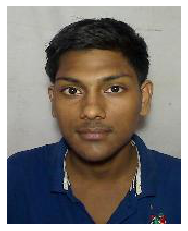

In [9]:
imagestr = root[0][2].text
with open("imageToSave.jpg","wb") as fh:
    fh.write(base64.b64decode(imagestr))
    
img = mpimg.imread('imageToSave.jpg',format='JPG')
plt.imshow(img)
plt.axis('off')
plt.show()



## Last 4 digit

In [12]:
last_digit = int(root.attrib['referenceId'][:4][-1])
root.attrib['referenceId'][:4]

'7108'

## Mobile Number

In [19]:
phone_number = '9776266152'
share_code = 'RAJI'
phone_reqd = phone_number + share_code
result = hashlib.sha256(phone_reqd.encode())
p = result.hexdigest()
for i in range (last_digit-1):
    result = hashlib.sha256(p.encode())
    p=result.hexdigest()
print(p)

370c0449bb9644869a24a353fd497120ea0672e75698b21b43ec26b36966116e


In [20]:
root[0][0].attrib['m']

'370c0449bb9644869a24a353fd497120ea0672e75698b21b43ec26b36966116e'

## Email Address

In [ ]:
emailid = 'smittal3797@gmail.com'
share_code = '3797'
email_reqd = emailid + share_code

for i in range (last_digit):
    result = hashlib.sha256(email_reqd.encode())
    print(result.hexdigest())

## Digital Signature Verification

In [29]:
b = root.getchildren()[1]
root.remove(b)
tree = ET.ElementTree(root)
# And write to file!
tree.write("out.xml")

/vertica_data/chinmay_news_analysis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  """Entry point for launching an IPython kernel.


In [32]:
f =open('uidai_offline_publickey_19062019.cer','r')
string = f.read()
f.close()
string

'-----BEGIN CERTIFICATE-----\nMIIF+jCCBOKgAwIBAgIEANbI0DANBgkqhkiG9w0BAQsFADCBkzELMAkGA1UEBhMCSU4xKjAoBgNV\nBAoTIWVNdWRocmEgQ29uc3VtZXIgU2VydmljZXMgTGltaXRlZDEdMBsGA1UECxMUQ2VydGlmeWlu\nZyBBdXRob3JpdHkxOTA3BgNVBAMTMGUtTXVkaHJhIFN1YiBDQSBDbGFzcyAzIGZvciBEb2N1bWVu\ndCBTaWduZXIgMjAxNDAeFw0xNzA2MDgxMDQ2MjZaFw0yMDA2MDcxMDQ2MjZaMIHmMQswCQYDVQQG\nEwJJTjEOMAwGA1UEChMFVUlEQUkxGjAYBgNVBAsTEVRlY2hub2xvZ3kgQ2VudHJlMQ8wDQYDVQQR\nEwY1NjAwOTIxEjAQBgNVBAgTCUthcm5hdGFrYTESMBAGA1UECRMJQmFuZ2Fsb3JlMTowOAYDVQQz\nEzFBYWRoYWFyIENvbXBsZXggTnRpIExheW91dCBUYXRhIE5hZ2FyIEtvZGlnZWhhbGxpMTYwNAYD\nVQQDEy1EUyBVTklRVUUgSURFTlRJRklDQVRJT04gQVVUSE9SSVRZIE9GIElORElBIDQwggEiMA0G\nCSqGSIb3DQEBAQUAA4IBDwAwggEKAoIBAQC/QeNsWm+7+RH6BMjb6y8Y2Zbh5keFNUEb835vJqrc\nYfRIMz6M7lFbgFtc3NpIpzQjmYjI3W9B/YqY1X/ddqLoyiSKJmsFF8zxrj3vMIy14dMDNI/UvQOa\niFS4FCH+zWF+pEghal8S7uehbYby2grRk5BHUTQW2KdY22oR67GU0QqB/GQ3j+9HOC8YXD489ygb\nm4x1x3v8OMMTWLbTOZP7nkOAgGud4LCtbucgzQx3cE85NXyIHDON1Vx0MeEy1KmL1QpQfDzSwNFm\nnvKAHhnRCaFLEIwKD2Dso8dhj49VELawWt

In [ ]:
from cryptography.x509 import load_pem_x509_certificate
from cryptography.hazmat.backends import default_backend

cert_str = '-----BEGIN CERTIFICATE----- MIIDBTCCAe2gAwIBAgIQEsuEXXy6BbJCK3bMU6GZ/TANBgkqhkiG9w0BAQsFADAt... -----END CERTIFICATE-----';

cert_obj = load_pem_x509_certificate(str.encode(cert_str), default_backend())
public_key = cert_obj.public_key();

In [36]:
import sys
import chilkat

cert = chilkat.CkCert()

#  Load a DER (binary) encoded certificate.
#  To load from a .pem or .p7b, or any other file format that contains
#  just one certificate, call LoadFromFile in exactly the same way.
#  The LoadFromFile method automatically detects the format and loads the certificate.
success = cert.LoadFromFile("uidai_offline_publickey_19062019.cer")
if (success == False):
    print(cert.lastErrorText())
    sys.exit()

#  Get the public key:
# pubKey is a CkPublicKey
pubKey = cert.ExportPublicKey()
if (cert.get_LastMethodSuccess() != True):
    print(cert.lastErrorText())
    sys.exit()

#  Examine the key type.
#  A PublicKey object can contain an RSA, ECC, or DSA public key.
#  The KeyType property will contain "rsa", "ecc", or "dsa".
print("key type = " + pubKey.keyType())



ModuleNotFoundError: No module named 'chilkat'

In [37]:
!pip install chilkat --user

ERROR: Could not find a version that satisfies the requirement chilkat (from versions: none)
ERROR: No matching distribution found for chilkat


In [ ]:
for item in root:
    for child in item:
        print(child.tag)

In [ ]:
import base64

In [ ]:
certificate = open('uidai_offline_publickey_19062019.cer','rb')

In [ ]:
certificate_read = certificate.read()

In [ ]:
certificate_encode = base64.encodebytes(certificate_read)

In [ ]:
certificate_encode

In [ ]:
!pip install pycrypto --user

In [ ]:
import Crypto
from Crypto.PublicKey import RSA
from Crypto import Random

In [ ]:
certificate_encode.verify()

In [39]:
!pip install M2Crypto

  Using cached https://files.pythonhosted.org/packages/74/18/3beedd4ac48b52d1a4d12f2a8c5cf0ae342ce974859fba838cbbc1580249/M2Crypto-0.35.2.tar.gz
  ERROR: Command errored out with exit status 1:
   command: /vertica_data/chinmay_news_analysis/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-c5cz9d5s/M2Crypto/setup.py'"'"'; __file__='"'"'/tmp/pip-install-c5cz9d5s/M2Crypto/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-2dr1a3qo --python-tag cp37
       cwd: /tmp/pip-install-c5cz9d5s/M2Crypto/
  Complete output (52 lines):
  running bdist_wheel
  running build
  running build_py
  copying M2Crypto/threading.py -> build/lib.linux-x86_64-3.7/M2Crypto
  copying M2Crypto/util.py -> build/lib.linux-x86_64-3.7/M2Crypto
  copying M2Crypto/EC.py -> build/lib.linux-x86_64-3.7/M2Crypto
  copying 

In [40]:
from M2Crypto import RSA, X509

ModuleNotFoundError: No module named 'M2Crypto'